In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/ryanshiz/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [58]:
datafile = '3-university.txt'
df = pd.read_table(datafile, sep=',')
df.head()
# Parse in .txt file

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353


In [59]:
df2 = pd.DataFrame(df.groupby(['Dept', 'Gender'], sort=False).sum())
df2
# Group by department and sum over each gender

Freq
Dept Gender      
A    Male     825
     Female   108
B    Male     560
     Female    25
C    Male     325
     Female   593
D    Male     417
     Female   375
E    Male     191
     Female   393
F    Male     373
     Female   341

In [60]:
# reset index to make data easier to deal with
df2 = df2.reset_index()

# Admitted Ms & Fs
df3 = df[df.Admit == 'Admitted']
df3 = df3.reset_index()

In [61]:
# Proportion admitted = admitted / total applications
df3['PoA'] = df3['Freq'] / df2['Freq']
df3

,index,Admit,Gender,Dept,Freq,PoA
0,0,Admitted,Male,A,512,0.620606
1,2,Admitted,Female,A,89,0.824074
2,4,Admitted,Male,B,353,0.630357
3,6,Admitted,Female,B,17,0.680000
4,8,Admitted,Male,C,120,0.369231
5,10,Admitted,Female,C,202,0.340641
6,12,Admitted,Male,D,138,0.330935
7,14,Admitted,Female,D,131,0.349333
8,16,Admitted,Male,E,53,0.277487
9,18,Admitted,Female,E,94,0.239186


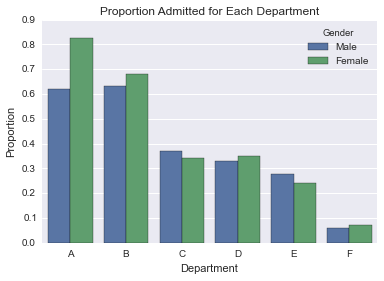

In [69]:
ax = sns.barplot('Dept', 'PoA', data=df3, hue='Gender')
ax.set(xlabel='Department', ylabel='Proportion', title='Proportion Admitted for Each Department')

Conclusion

From this graph we can see that the proportions of male and female students admitted are roughly the same across all departments, with the notable exception of dept. A, which admitted 20% more females (relatively).